# WeatherPy

Observations
1 - 
2 - 
3 - 

In [1]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import time
from scipy.stats import linregress

# Import API Key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Setting the url to call the API
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
# query_url = f"{url}appid={weather_api_key}&units{units}&q="

In [4]:
# Creating empty lists 
city_name = []
max_temps = []
humidity_level = []
cloudiness = []
wind_speed = []
country_name = []
date = []
lat = []
lng = []

counter = 0
counter_two = 1

# Starting the for loop to call on the API Data

print(f'Gathering Weather Data')
print(f'-----------------------')

for city in cities:
    try:
        # Converting into a JSON
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        city_response = requests.get(query_url)
        city_json = city_response.json()
        
        
        
        # Fill empty lists above with weather data
        city_name.append(city_json["name"])
        cloudiness.append(city_json["clouds"]["all"])
        max_temps.append(city_json["main"]["temp_max"])
        humidity_level.append(city_json["main"]["humidity"])
        wind_speed.append(city_json["wind"]["speed"])
        country_name.append(city_json["sys"]["country"])
        date.append(city_json["dt"])
        lat.append(city_json["coord"]["lat"])
        lng.append(city_json["coord"]["lon"])
        
        if counter > 49:
            counter = 1
            counter_two += 1
        else: 
            counter += 1
        
        print(f"Processing Record {counter} of set {counter_two} | {city}")
    
    except Exception:
        print("City not found. Skipping....")
        
print("-----------------------")
print("Weather Data Complete")

Gathering Weather Data
-----------------------
Processing Record 1 of set 1 | bredasdorp
Processing Record 2 of set 1 | port alfred
Processing Record 3 of set 1 | surt
Processing Record 4 of set 1 | adrar
Processing Record 5 of set 1 | atuona
Processing Record 6 of set 1 | grindavik
Processing Record 7 of set 1 | rikitea
Processing Record 8 of set 1 | lagoa
Processing Record 9 of set 1 | mehamn
Processing Record 10 of set 1 | nikolskoye
Processing Record 11 of set 1 | wattegama
Processing Record 12 of set 1 | qaanaaq
Processing Record 13 of set 1 | hami
Processing Record 14 of set 1 | nanortalik
Processing Record 15 of set 1 | srednekolymsk
Processing Record 16 of set 1 | agadez
Processing Record 17 of set 1 | jamestown
Processing Record 18 of set 1 | new norfolk
Processing Record 19 of set 1 | busselton
Processing Record 20 of set 1 | senneterre
City not found. Skipping....
Processing Record 21 of set 1 | ushuaia
Processing Record 22 of set 1 | yeppoon
Processing Record 23 of set 1 | 

Processing Record 43 of set 4 | riyadh
Processing Record 44 of set 4 | nurota
Processing Record 45 of set 4 | naica
Processing Record 46 of set 4 | khovu-aksy
Processing Record 47 of set 4 | beringovskiy
City not found. Skipping....
Processing Record 48 of set 4 | abu dhabi
Processing Record 49 of set 4 | yatou
Processing Record 50 of set 4 | qaqortoq
Processing Record 1 of set 5 | mitsamiouli
Processing Record 2 of set 5 | xiuyan
Processing Record 3 of set 5 | kennett
Processing Record 4 of set 5 | perth
Processing Record 5 of set 5 | buraydah
Processing Record 6 of set 5 | lampa
Processing Record 7 of set 5 | hithadhoo
Processing Record 8 of set 5 | obuasi
City not found. Skipping....
Processing Record 9 of set 5 | kununurra
Processing Record 10 of set 5 | cartagena del chaira
Processing Record 11 of set 5 | vila franca do campo
Processing Record 12 of set 5 | broken hill
Processing Record 13 of set 5 | sola
Processing Record 14 of set 5 | amga
Processing Record 15 of set 5 | portlan

Processing Record 28 of set 8 | harjavalta
Processing Record 29 of set 8 | bend
Processing Record 30 of set 8 | quatre cocos
Processing Record 31 of set 8 | san pedro
Processing Record 32 of set 8 | saldanha
Processing Record 33 of set 8 | gondanglegi
City not found. Skipping....
Processing Record 34 of set 8 | ouesso
Processing Record 35 of set 8 | luanda
Processing Record 36 of set 8 | ayorou
Processing Record 37 of set 8 | rio gallegos
Processing Record 38 of set 8 | maniitsoq
Processing Record 39 of set 8 | acajutla
Processing Record 40 of set 8 | klaksvik
Processing Record 41 of set 8 | makakilo city
City not found. Skipping....
Processing Record 42 of set 8 | acapulco
Processing Record 43 of set 8 | naze
Processing Record 44 of set 8 | quievrain
Processing Record 45 of set 8 | melnikovo
Processing Record 46 of set 8 | erzin
Processing Record 47 of set 8 | valente
Processing Record 48 of set 8 | pocone
Processing Record 49 of set 8 | ust-nera
Processing Record 50 of set 8 | ati
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
new_weather_df = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temps,
    "Humidity": humidity_level,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country_name,
    "Date": date
})

new_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,56.08,66,93,4.81,ZA,1650765620
1,Port Alfred,-33.5906,26.8910,58.17,97,29,3.00,ZA,1650765622
2,Sirte,31.2089,16.5887,60.37,76,0,4.07,LY,1650765622
3,Adrar,20.5022,-10.0711,69.85,31,0,10.96,MR,1650765626
4,Atuona,-9.8000,-139.0333,79.50,77,76,16.64,PF,1650765629


In [6]:
# convert to csv file
new_weather_df.to_csv(output_data_file)
new_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,56.08,66,93,4.81,ZA,1650765620
1,Port Alfred,-33.5906,26.8910,58.17,97,29,3.00,ZA,1650765622
2,Sirte,31.2089,16.5887,60.37,76,0,4.07,LY,1650765622
3,Adrar,20.5022,-10.0711,69.85,31,0,10.96,MR,1650765626
4,Atuona,-9.8000,-139.0333,79.50,77,76,16.64,PF,1650765629
...,...,...,...,...,...,...,...,...,...
562,Shingū,33.7333,135.9833,61.56,98,100,8.59,JP,1650765909
563,Santa Isabel Rio Negro,-0.4139,-65.0192,76.33,90,73,2.64,BR,1650765909
564,Waipawa,-41.4122,175.5153,61.57,52,76,4.70,NZ,1650765910
565,Sibay,52.7181,58.6658,38.93,59,100,4.05,RU,1650765910


In [7]:
new_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,19.459057,22.009328,60.408624,71.684303,58.679012,7.919506,1.650766e+09
std,33.299879,90.354942,20.897137,21.128602,40.398186,5.758981,1.027488e+02
min,-54.800000,-175.200000,-8.370000,1.000000,0.000000,0.000000,1.650765e+09
25%,-6.454400,-58.088650,45.585000,63.000000,16.500000,3.590000,1.650766e+09
50%,20.894700,25.570100,65.260000,76.000000,69.000000,6.440000,1.650766e+09
75%,48.948850,103.225250,77.080000,87.000000,100.000000,10.995000,1.650766e+09
max,78.218600,179.316700,95.140000,100.000000,100.000000,41.430000,1.650766e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = new_weather_df[(new_weather_df["Humidity"]>100)].index
humid_cities

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

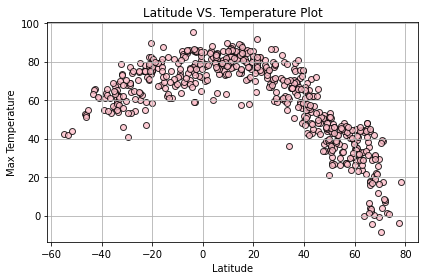

In [10]:
# Plotting
lat_temp = plt.scatter(lat, max_temps, marker="o", facecolors="pink", edgecolors = "black", alpha = 0.8)

# Formating
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude VS. Temperature Plot")
plt.grid()
plt.tight_layout()
plt.savefig("../Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

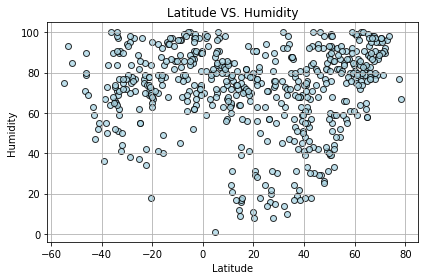

In [11]:
# Plotting
lat_humid = plt.scatter(lat, humidity_level, marker="o", facecolors="lightblue", edgecolors = "black", alpha = 0.8)

# Formating
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude VS. Humidity")
plt.grid()
plt.tight_layout()
plt.savefig("../Lat_vs_Humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

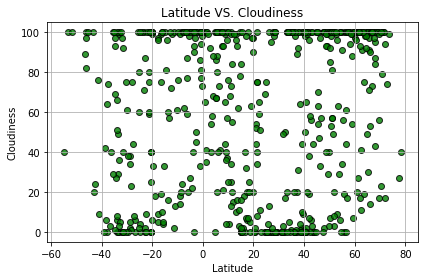

In [12]:
# Plotting
lat_cloud = plt.scatter(lat, cloudiness, marker="o", facecolors="green", edgecolors = "black", alpha = 0.8)

# Formating
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude VS. Cloudiness")
plt.grid()
plt.tight_layout()
plt.savefig("../Lat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

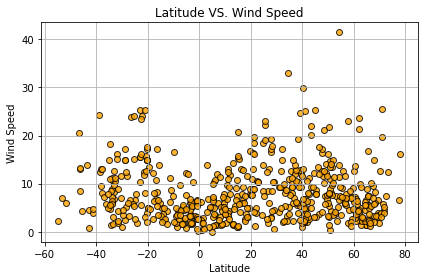

In [13]:
# Plotting
lat_wind = plt.scatter(lat, wind_speed, marker="o", facecolors="orange", edgecolors = "black", alpha = 0.8)

# Formating
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude VS. Wind Speed")
plt.grid()
plt.tight_layout()
plt.savefig("../Lat_vs_Wind.png")
plt.show()

## Linear Regression

In [14]:
# Creating the Northern and Southern Hemispheres
Norhtern_H = pd.DataFrame(new_weather_df[(new_weather_df["Lat"]>0)])
Southern_H = pd.DataFrame(new_weather_df[(new_weather_df["Lat"]<0)])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Linear Regression
x_value = Northern_H["Max Temp"]
y_value = Northern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='lavender', edgecolors = "black")
plt.title("Max Temp VS Latitude - Northern Hemisphere")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(0,20), fontsize=14, color='navy')
plt.show()
plt.savefig("../Lat_vs_Temp_Northern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Northern_H['Max Temp'], Northern_H['Lat'])[0],5)
print(f'The r-value is: {correlation_coe}')

NameError: name 'Northern_H' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Linear Regression
x_value = Southern_H["Max Temp"]
y_value = Southern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='salmon', edgecolors = "black")
plt.title("Max Temp VS Latitude - Southern Hemisphere")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(75,-40), fontsize=14, color='navy')
plt.show()
plt.savefig("../Lat_vs_Temp_Northern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Southern_H['Max Temp'], Southern_H['Lat'])[0],5)
print(f'The r-value is: {correlation_coe}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Linear Regression
x_value = Northern_H["Humidity"]
y_value = Northern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='lavender', edgecolors = "black")
plt.title("Humidity % VS Latitude - Northern Hemisphere")
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(10,70), fontsize=14, color='navy')
plt.show()
plt.savefig("../Lat_vs_Humid_Northern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Northern_H['Humidity'], Northern_H['Lat'])[0],5)
print(f'The r-value is: {correlation_coe}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Linear Regression
x_value = Southern_H["Humidity"]
y_value = Southern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='salmon', edgecolors = "black")
plt.title("Humidity % VS Latitude - Southern Hemisphere")
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(25,-48), fontsize=14, color='navy')
plt.show()
plt.savefig("../Lat_vs_Humidity_Southern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Southern_H['Humidity'], Southern_H['Lat'])[0],5)
print(f'The r-value is: {correlation_coe}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Linear Regression
x_value = Northern_H["Cloudiness"]
y_value = Northern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='lavender', edgecolors = "black")
plt.title("Cloudiness % VS Latitude - Northern Hemisphere")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(10,75), fontsize=14, color='navy')
plt.show()
plt.savefig("../Lat_vs_cloud_Northern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Northern_H['Cloudiness'], Northern_H['Lat'])[0],4)
print(f'The r-value is: {correlation_coe}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Linear Regression
x_value = Southern_H["Cloudiness"]
y_value = Southern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='salmon', edgecolors = "black")
plt.title("Cloudiness % VS Latitude - Southern Hemisphere")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(25,-48), fontsize=14, color='navy')
plt.show()
plt.savefig("../Lat_vs_cloud_Southern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Southern_H['Cloudiness'], Southern_H['Lat'])[0],2)
print(f'The r-value is: {correlation_coe}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Linear Regression
x_value = Northern_H["Wind Speed"]
y_value = Northern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='lavender', edgecolors = "black")
plt.title("Wind Speed (mph) VS Latitude - Northern Hemisphere")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(21,4), fontsize=14, color='navy')
plt.show()
plt.savefig("../Lat_vs_wind_Northern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Northern_H['Wind Speed'], Northern_H['Lat'])[0],5)
print(f'The r-value is: {correlation_coe}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Linear Regression
x_value = Southern_H["Wind Speed"]
y_value = Southern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='salmon', edgecolors = "black")
plt.title("Wind Speed (mph) VS Latitude - Southern Hemisphere")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(19,-5), fontsize=14, color='navy')
plt.show()
plt.savefig("../Lat_vs_wind_Southern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Southern_H['Wind Speed'], Southern_H['Lat'])[0],5)
print(f'The r-value is: {correlation_coe}')